In [1]:
# !pip install tensorflow
# !pip install jupyter

  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
  Using cached notebook-7.0.6-py3-none-any.whl.metadata (10 kB)
  Using cached qtconsole-5.5.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached jupyter_console-6.6.3-py3-none-any.whl (24 kB)
  Using cached nbconvert-7.12.0-py3-none-any.whl.metadata (7.7 kB)
  Using cached ipywidgets-8.1.1-py3-none-any.whl.metadata (2.4 kB)
  Using cached comm-0.2.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached widgetsnbextension-4.0.9-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.9-py3-none-any.whl.metadata (4.1 kB)
  Using cached beautifulsoup4-4.12.2-py3-none-any.whl (142 kB)
  Using cached bleach-6.1.0-py3-none-any.whl.metadata (30 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl (25 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached jupyterlab_pygments-0.3.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached mistune-3.0.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached nbclient-

https://becominghuman.ai/step-by-step-neural-network-tutorial-for-beginner-cc71a04eedeb

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

2023-12-18 14:03:12.008164: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-18 14:03:12.008302: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-18 14:03:12.182930: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-18 14:03:12.716395: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-18 14:03:16.365198: W tensorflow/comp

In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

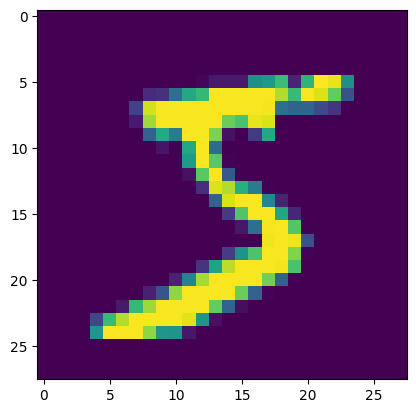

In [30]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0]) # to see a sample of X_train

In [25]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Our image is 28x28, and therefore is two-dimensional. Because of our perceptron only able to read one-dimensional data, let’s flatten them.

In [3]:
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0 # 255 is the pixel values range. a pixel can have a value between 0 and 255
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

You will see that the size changed into 784 because of the flatten

In [6]:
y_train.shape, x_train.shape

((60000, 10), (60000, 784))

In [5]:
y_test.shape 

(10000, 10)

The Sequential model is the easiest model Keras has. 
The first line of model.add method is adding your hidden layer with 10 cells, coming from 784 input cells.

The second add method is adding your output layer to the network.
The Relu and Softmax activation options are non-linear. 
Being able to use non-linear data makes Neural Network particularly useful. 
Generally, neural networks can map any data distribution at any level of complexity.
You don’t have to know what Relu and Softmax are. These are too complex for a beginner. You just need to follow these tips:

    Use Relu whenever possible, on every hidden layer.
    Use Softmax on output layers with more than two categories to be predicted.
    Use Sigmoid on an output layer with two categories.

In [7]:
# Create a Sequential model
model = Sequential()
# Add a Dense layer with 10 units, input dimension 784, and ReLU activation
model.add(Dense(10, input_dim=784, activation='relu'))
# Add another Dense layer with 10 units and softmax activation
model.add(Dense(10, activation='softmax'))
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2023-12-18 14:04:16.596486: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4247 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1660, pci bus id: 0000:61:00.0, compute capability: 7.5


After creating your model, call compile method to finish your model. It usually takes three parameters. Always use categorical_crossentropy for multi-categories, and binary_crossentropy for two categories. Use adam or rmsprop as the optimizer since both of them are pretty good. And you need accuracy as the metric to check your network performance.

we will use 10% of the training data as the validation data, hence validation_split was set to 0.1.

epochs is the number of training loops we will do. One epoch will expose all of our training data once to the network. More epochs means the network will know better about our data.

In [8]:
model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10


2023-12-18 14:04:30.928424: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-18 14:04:31.378080: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fe13c0310b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-18 14:04:31.378148: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660, Compute Capability 7.5
2023-12-18 14:04:31.496778: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-18 14:04:33.079074: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1702904673.432909    3382 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1688/1688 [==============================] - 18s 4ms/step - loss: 0.5364 - accuracy: 0.8437 - val_loss: 0.2573 - val_accuracy: 0.9300
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2925 - accuracy: 0.9170 - val_loss: 0.2302 - val_accuracy: 0.9350
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2646 - accuracy: 0.9261 - val_loss: 0.2101 - val_accuracy: 0.9408
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2481 - accuracy: 0.9301 - val_loss: 0.2001 - val_accuracy: 0.9450
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2353 - accuracy: 0.9331 - val_loss: 0.1972 - val_accuracy: 0.9475
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2269 - accuracy: 0.9356 - val_loss: 0.1884 - val_accuracy: 0.9483
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2194 - accuracy: 0.9365 - val_loss: 0.1847 - val_accuracy: 0.9500
Ep

In [9]:
_, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2121 - accuracy: 0.9386
0.9386000037193298


In [10]:
model2 = Sequential()
# Add a Dense layer with 50 units, input dimension 784, and ReLU activation
model2.add(Dense(50, input_dim=784, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.3590 - accuracy: 0.8987 - val_loss: 0.1833 - val_accuracy: 0.9512
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1819 - accuracy: 0.9472 - val_loss: 0.1295 - val_accuracy: 0.9655
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1349 - accuracy: 0.9604 - val_loss: 0.1083 - val_accuracy: 0.9703
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1077 - accuracy: 0.9676 - val_loss: 0.0997 - val_accuracy: 0.9705
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0897 - accuracy: 0.9732 - val_loss: 0.0992 - val_accuracy: 0.9705
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0766 - accuracy: 0.9771 - val_loss: 0.0933 - val_accuracy: 0.9730
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0662 - accuracy: 0.9799 - val_loss: 0.0915 - val_accuracy:

This changes the number of the hidden layer cells. We’ve increased these from 10 to 50.

In [11]:
_, test_acc = model2.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.9720
0.972000002861023


In [12]:
model3 = Sequential()
# Add a Dense layer with 50 units, input dimension 784, and ReLU activation
model3.add(Dense(50,input_dim=784, activation='relu'))
# Add another Dense layer with 50 units and ReLU activation
model3.add(Dense(50, activation='relu'))
# Add a Dense layer with 10 units and softmax activation
model3.add(Dense(10, activation='softmax'))
# Compile the model
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
model3.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 10s 5ms/step - loss: 0.3041 - accuracy: 0.9105 - val_loss: 0.1311 - val_accuracy: 0.9613
Epoch 2/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1389 - accuracy: 0.9582 - val_loss: 0.1079 - val_accuracy: 0.9688
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1033 - accuracy: 0.9681 - val_loss: 0.0958 - val_accuracy: 0.9722
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0825 - accuracy: 0.9748 - val_loss: 0.1040 - val_accuracy: 0.9715
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0695 - accuracy: 0.9784 - val_loss: 0.0938 - val_accuracy: 0.9735
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0576 - accuracy: 0.9816 - val_loss: 0.0999 - val_accuracy: 0.9730
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0520 - accuracy: 0.9834 - val_loss: 0.0954 - val_accuracy

In [13]:
_, test_acc = model3.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0953 - accuracy: 0.9745
0.9745000004768372


Let’s just apply the CNN to our network:

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Add a channel dimension and normalize pixel values
x_train = x_train[:,:,:,np.newaxis] / 255.0
x_test = x_test[:,:,:,np.newaxis] / 255.0
# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

If you check your x_train, you will have 60,000 x 28 x 28 x 1 data.

Why x 1?

The data CNN needs to read must be like this: total_data x width x height x channels.
Add a new axis to represent the channel dimension:

    x_train[:, :, :, np.newaxis]: This indexing operation adds a new axis to the x_train array at the end. The np.newaxis is used to add a new dimension of size 1. In the context of image data, this new dimension represents the channel. Grayscale images typically have one channel, and color images have three channels (Red, Green, Blue). By adding this new axis, you are explicitly specifying that each image in the training set has one channel.
    For example, if x_train initially had shape (60000, 28, 28), after this operation, it will have shape (60000, 28, 28, 1).

Normalize pixel values:

    / 255.0: After adding the channel dimension, the pixel values in the images are normalized by dividing each pixel value by 255.0. This operation scales the pixel values to be in the range [0, 1]. Normalization is a common preprocessing step in machine learning, especially for neural networks, to ensure that the input features are on a similar scale, which can help with the convergence of the training process.

In [17]:
y_train.shape, x_train.shape

((60000, 10), (60000, 28, 28, 1))

    Convolutional Layer:
        model4.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1))): Adds a convolutional layer to the model. This layer has 64 filters, each with a kernel size of 2x2. The 'same' padding ensures that the spatial dimensions of the output are the same as the input. The ReLU activation function introduces non-linearity to the model. The input_shape parameter is set to (28, 28, 1), indicating that the input images are 28x28 pixels with one channel.

    Max Pooling Layer:
        model4.add(MaxPooling2D(pool_size=2)): Adds a max pooling layer with a pool size of 2x2. Max pooling reduces the spatial dimensions of the input, helping to decrease computation and make the network more robust to variations in input.

    Flatten Layer:
        model4.add(Flatten()): Flattens the output of the previous layer into a one-dimensional vector. This is necessary when transitioning from convolutional layers to fully connected layers.

    Fully Connected (Dense) Layer:
        model4.add(Dense(10, activation='softmax')): Adds a fully connected (dense) layer with 10 units (assuming you have 10 classes in your classification task). The softmax activation function is used in the output layer for multi-class classification. It converts the raw output scores into probabilities.

    Compilation:
        model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']): Compiles the model. It uses categorical crossentropy as the loss function, the Adam optimizer, and accuracy as the metric to monitor during training.

This CNN architecture is suitable for image classification tasks, especially on datasets like MNIST where the goal is to classify handwritten digits. The convolutional layers learn hierarchical features from the images, and the fully connected layer produces class probabilities. The model is trained using the specified loss function, optimizer, and metrics.

In [19]:
# Create a Sequential model
model4 = Sequential()
# Add a convolutional layer with 64 filters, kernel size 2, 'same' padding, ReLU activation, and input shape (28, 28, 1)
model4.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1))) 
# Add a max pooling layer with pool size 2
model4.add(MaxPooling2D(pool_size=2))
# Flatten the output of the previous layer
model4.add(Flatten())
# Add a fully connected (dense) layer with 10 units and softmax activation
model4.add(Dense(10, activation='softmax'))
# Compile the model
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense_7 (Dense)             (None, 10)                125450    
                                                                 
Total params: 125770 (491.29 KB)
Trainable params: 125770 (491.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


conv2d changes your 28x28x1 image to 28x28x64. Just imagine this as 64 hidden layer cells.

MaxPooling2D reduces the width and height so that you will not need to compute all the cells. It reduces the size to 14x14x64.

Finally, flatten just flattens out the output of MaxPooling into a hidden layer of 12544 cells.

In [21]:
model4.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10


2023-12-18 14:43:09.814258: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1688/1688 [==============================] - 20s 5ms/step - loss: 0.2433 - accuracy: 0.9321 - val_loss: 0.0936 - val_accuracy: 0.9735
Epoch 2/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0937 - accuracy: 0.9721 - val_loss: 0.0795 - val_accuracy: 0.9790
Epoch 3/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0698 - accuracy: 0.9799 - val_loss: 0.0661 - val_accuracy: 0.9822
Epoch 4/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0584 - accuracy: 0.9824 - val_loss: 0.0733 - val_accuracy: 0.9788
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0500 - accuracy: 0.9845 - val_loss: 0.0630 - val_accuracy: 0.9837
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0436 - accuracy: 0.9866 - val_loss: 0.0592 - val_accuracy: 0.9843
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0384 - accuracy: 0.9884 - val_loss: 0.0664 - val_accuracy: 0.9837
Ep

In [22]:
_, test_acc = model4.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0692 - accuracy: 0.9796
0.9796000123023987
